In [15]:
import matplotlib.pyplot as plt
import numpy as np
from openbb import obb
import pyfinlib
import logging

# logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)

# Create our portfolio of equities
tickers = ['AAPL','META', 'C', 'DIS', 'CL=F']

# Set the investment weights (I arbitrarily picked for example)
weights = np.array([.1, .1, .1, .1, .6])

# Set an initial investment level
initial_investment = 1000000


In [16]:
data = obb.equity.price.historical(symbol=tickers, start_date="2022-01-01", provider='yfinance')
data.results[0].date, data.results[-1].date

(datetime.date(2022, 1, 3), datetime.date(2025, 6, 20))

In [17]:
values = 200
portfolio = pyfinlib.Portfolio(
    [
        pyfinlib.PortfolioAsset(.1, "AAPL", 1, [i.close for i in data.results if i.symbol == 'AAPL'][-values:]),
        pyfinlib.PortfolioAsset(.1, "META", 1, [i.close for i in data.results if i.symbol == 'META'][-values:]),
        pyfinlib.PortfolioAsset(.1, "C", 1, [i.close for i in data.results if i.symbol == 'C'][-values:]),
        pyfinlib.PortfolioAsset(.1, "DIS", 1, [i.close for i in data.results if i.symbol == 'DIS'][-values:]),
        pyfinlib.PortfolioAsset(.6, "CL=F", 1, [i.close for i in data.results if i.symbol == 'CL=F'][-values:]),
     ]
)

In [18]:
VaR_historical = portfolio.value_at_risk_percent(0.05)
VaR_historical_10 = portfolio.value_at_risk_percent(0.1)
VaR_historical, VaR_historical_10

(-0.019117173247151065, -0.014677803526828561)

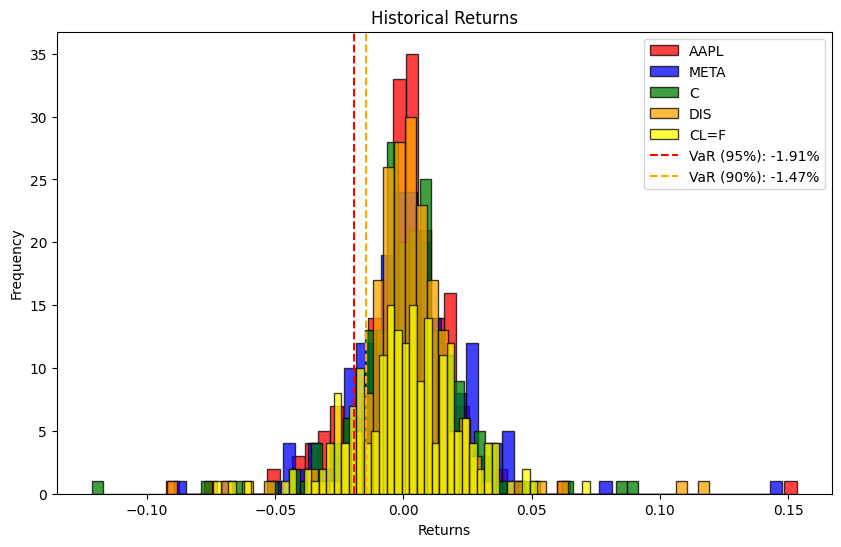

In [19]:
# Plot the historical returns and VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'AAPL'][-values:]), bins=50, alpha=0.75, color='red', edgecolor='black', label='AAPL')
plt.hist(pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'META'][-values:]), bins=50, alpha=0.75, color='blue', edgecolor='black', label='META')
plt.hist(pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'C'][-values:]), bins=50, alpha=0.75, color='green', edgecolor='black', label='C')
plt.hist(pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'DIS'][-values:]), bins=50, alpha=0.75, color='orange', edgecolor='black', label='DIS')
plt.hist(pyfinlib.util.rates_of_change([i.close for i in data.results if i.symbol == 'CL=F'][-values:]), bins=50, alpha=0.75, color='yellow', edgecolor='black', label='CL=F')
plt.axvline(VaR_historical, color='red', linestyle='--', label=f'VaR (95%): {VaR_historical:.2%}')
plt.axvline(VaR_historical_10, color='orange', linestyle='--', label=f'VaR (90%): {VaR_historical_10:.2%}')
plt.title('Historical Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [20]:
value = portfolio.value_at_risk(0.1, 1_000_000.)
value

14677.803526828648

1 day VaR @ 95% confidence: 14678.0
2 day VaR @ 95% confidence: 20758.0
3 day VaR @ 95% confidence: 25423.0
4 day VaR @ 95% confidence: 29356.0
5 day VaR @ 95% confidence: 32821.0
6 day VaR @ 95% confidence: 35953.0
7 day VaR @ 95% confidence: 38834.0
8 day VaR @ 95% confidence: 41515.0
9 day VaR @ 95% confidence: 44033.0
10 day VaR @ 95% confidence: 46415.0
11 day VaR @ 95% confidence: 48681.0
12 day VaR @ 95% confidence: 50845.0
13 day VaR @ 95% confidence: 52922.0
14 day VaR @ 95% confidence: 54919.0
15 day VaR @ 95% confidence: 56847.0


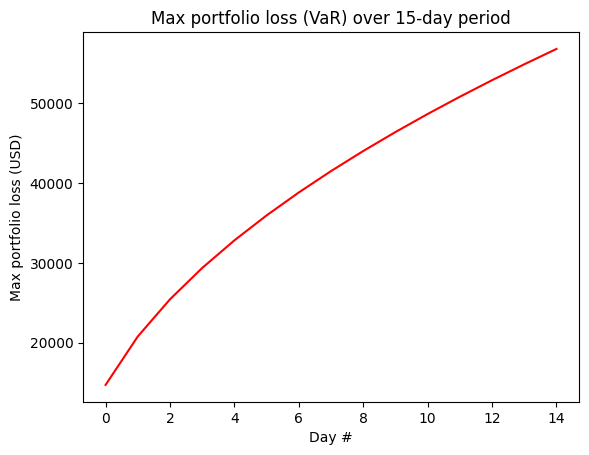

In [21]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):
    var_array.append(np.round(pyfinlib.risk.value_at_risk.scale_value_at_risk(value, x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(pyfinlib.risk.value_at_risk.scale_value_at_risk(value, x))))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title(f"Max portfolio loss (VaR) over {num_days}-day period")
plt.plot(var_array, "r")